In [ ]:
import torch
import matplotlib.pyplot as plt
from pathlib import Path

Saved: /home/gabriel/Projects/REBECA/notebooks/outputs/samples/rebeca_users10_cols8.pdf


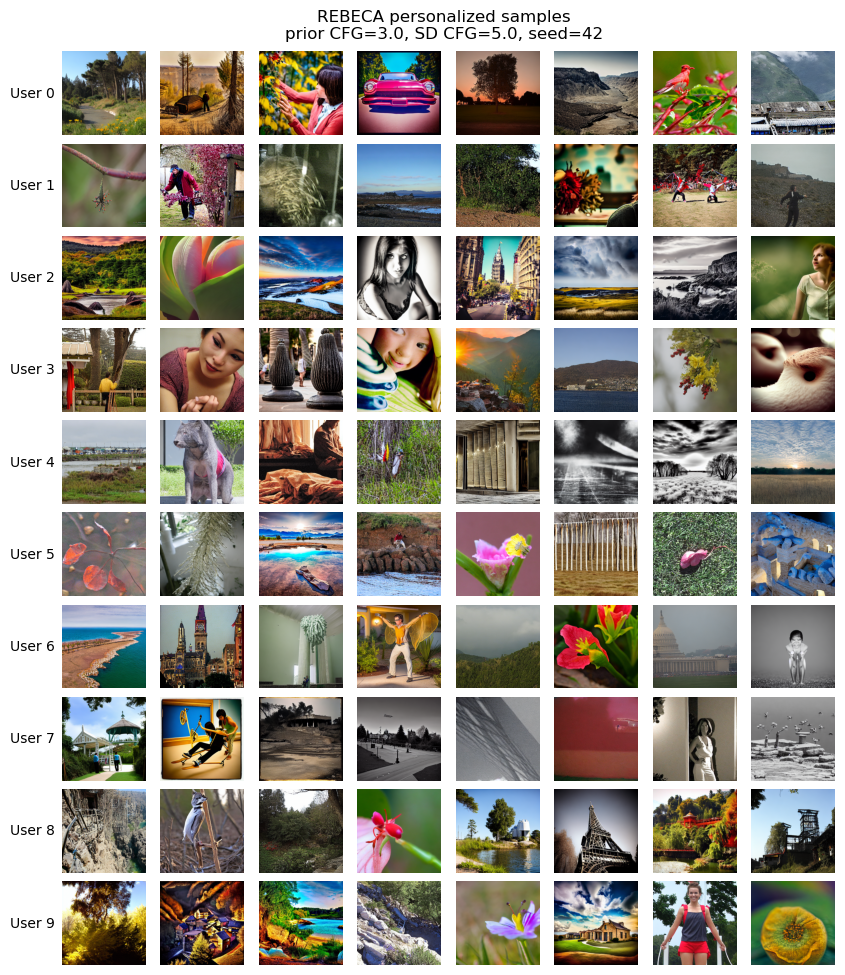

PosixPath('outputs/samples/rebeca_users10_cols8.pdf')

In [ ]:

def generate_user_samples_grid(
    embcfg,
    pipecfg=5.0,
    seed=42,
    n_cols=5,
    user_ids=None,
    base_dir=None,
    out_path=None,
    show=True,
    dpi=300
):
    """
    Generate a grid of personalized samples for multiple users.
    
    Args:
        embcfg: Embedding configuration value (will be varied in loops)
        pipecfg: Pipeline configuration value (default: 5.0)
        seed: Random seed (default: 42)
        n_cols: Number of images per user (default: 5)
        user_ids: List of user IDs to display. If None, uses range(12)
        base_dir: Base directory for data files. If None, uses default path
        out_path: Output PDF path. If None, auto-generates from params
        show: Whether to display the figure (default: True)
        dpi: DPI for saved figure (default: 300)
    
    Returns:
        Path to saved figure
    """
    if user_ids is None:
        user_ids = list(range(12))
    
    if base_dir is None:
        base_dir = Path("../data/flickr/evaluation/diffusion_priors/models/samples")
    else:
        base_dir = Path(base_dir)
    
    run_dir = base_dir / f"embcfg_{embcfg}_pipecfg_{pipecfg}_seed_{seed}"
    n_rows = len(user_ids)
    
    if out_path is None:
        out_path = f"rebeca_users{len(user_ids)}_cols{n_cols}_embcfg{embcfg}.pdf"
    out_path = Path(out_path)
    
    # Create figure with proper spacing for labels
    # hspace and wspace control spacing: smaller values = less space
    fig, axes = plt.subplots(
        n_rows, n_cols,
        figsize=(n_cols * 1.1, n_rows * 1.05),  # Reduced figure size for tighter layout
        gridspec_kw={
            'left': 0.06,  # Reduced left margin to minimize whitespace between labels and images
            'right': 0.95, 
            'top': 0.92, 
            'bottom': 0.05,
            'hspace': 0.1,  # Vertical spacing between rows (reduced)
            'wspace': 0.05  # Horizontal spacing between columns (reduced)
        }
    )
    
    # Ensure axes is 2D for uniform indexing
    if n_rows == 1:
        axes = axes[None, :]
    if n_cols == 1:
        axes = axes[:, None]
    
    for row, uid in enumerate(user_ids):
        filepath = run_dir / f"embcfg_{embcfg}_pipecfg_{pipecfg}_seed_{seed}_userid_{uid}.data"
        
        if not filepath.exists():
            print(f"Warning: {filepath} not found, skipping user {uid}")
            for col in range(n_cols):
                axes[row, col].axis("off")
            continue
        
        data = torch.load(filepath, map_location="cpu", weights_only=False)
        imgs = data["images"]
        
        for col in range(n_cols):
            ax = axes[row, col]
            ax.axis("off")
            
            # Safety: skip if no image
            if isinstance(imgs, torch.Tensor):
                if col >= imgs.shape[0]:
                    continue
                img = imgs[col].detach().cpu()
                if img.ndim == 3 and img.shape[0] in (1, 3):
                    img = img.permute(1, 2, 0)
                if img.max() > 1:
                    img = img / 255
                img = img.clamp(0, 1)
                ax.imshow(img)
            else:
                if col >= len(imgs):
                    continue
                ax.imshow(imgs[col])
        
        # Place user ID label using figure coordinates
        # Calculate positions based on the actual axes position
        bbox = axes[row, 0].get_position()
        y_center = (bbox.y0 + bbox.y1) / 2
        x_left = bbox.x0  # Left edge of first image
        
        fig.text(
            x_left - 0.008,  # Position label very close to the first image (reduced offset)
            y_center,        # y-position based on actual axes position
            f"User {uid}",
            va="center",
            ha="right",      # Right-align so text ends near the image
            fontsize=10,
            rotation=0,      # Horizontal text
        )
    
    # Title
    fig.suptitle(
        f"REBECA personalized samples\nprior CFG={embcfg}, SD CFG={pipecfg}, seed={seed}",
        fontsize=12,
        y=0.96
    )
    
    # Save PDF
    fig.savefig(out_path, bbox_inches="tight", dpi=dpi)
    print(f"Saved: {out_path.resolve()}")
    
    if show:
        plt.show()
    else:
        plt.close(fig)
    
    return out_path


# Example usage: generate for a single embcfg value
generate_user_samples_grid(
    embcfg=3.0,
    pipecfg=5.0,
    seed=42,
    n_cols=8,
    user_ids=list(range(10)),
    out_path="./outputs/samples/rebeca_users10_cols8.pdf"
)


In [32]:
# Generate grids for multiple embcfg values
embcfg_values = [3.0, 5.0, 7.0, 9.0]  # vary as needed
pipecfg = 5.0
seed = 42
n_cols = 10
user_ids = list(range(12))

for embcfg in embcfg_values:
    generate_user_samples_grid(
        embcfg=embcfg,
        pipecfg=pipecfg,
        seed=seed,
        n_cols=n_cols,
        user_ids=user_ids,
        show=False,
        out_path=f"./outputs/samples/rebeca_users{len(user_ids)}_cols{n_cols}_embcfg{embcfg}.pdf"
    )


Saved: /home/gabriel/Projects/REBECA/notebooks/outputs/samples/rebeca_users12_cols10_embcfg3.0.pdf
Saved: /home/gabriel/Projects/REBECA/notebooks/outputs/samples/rebeca_users12_cols10_embcfg5.0.pdf
Saved: /home/gabriel/Projects/REBECA/notebooks/outputs/samples/rebeca_users12_cols10_embcfg7.0.pdf
Saved: /home/gabriel/Projects/REBECA/notebooks/outputs/samples/rebeca_users12_cols10_embcfg9.0.pdf
